In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [1]:
import numpy as np
from qiskit import *
%matplotlib inline
from math import pi, sqrt
import random

In [2]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumC):
    return visualization.plot_bloch_multivector(execute(quantumC, backend).
                                         result().get_statevector())

In [3]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
    return newState

In [4]:
def getMeasure(quantumC, n):
    measures = []
    for i in range(0, n):
        outcome = execute(circ, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
    return measures

In [5]:
def makeCirc(n, m):
    initState = ''
    for i in range(0, n-m):
        initState += str(random.randint(0, 1))
    for i in range(0, m):
        initState += str(0)
    print(initState)
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [10]:
circ = makeCirc(4, 1)
#getBloch(circ)

1100


In [11]:
circ.crx(-pi/2, 2, 3)
circ.cx(1, 2)
circ.csx(1, 3)
circ.cx(0, 2)
circ.csx(0, 3)
circ.csx(2, 3)
circ.i(1)

for i in range(0, 4):
    circ.measure(i, i)

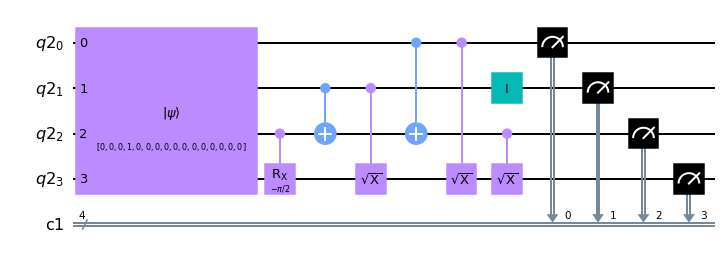

In [12]:
circ.draw('mpl')

In [13]:
circ = QuantumCircuit(4)
circ.crx(-pi/2, 2, 3)
circ.cx(1, 2)
circ.csx(1, 3)
circ.cx(0, 2)
circ.csx(0, 3)
circ.csx(2, 3)

In [14]:
subber = circ.to_gate(label=' Subber')

In [16]:
circ2 = QuantumCircuit(8)
circ2.append(subber, [0, 1, 2, 3])

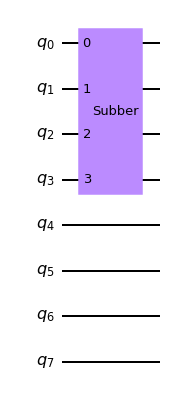

In [17]:
circ2.draw('mpl')